#Bilinear Transform: Digital Butterworth LPF

## Modules

In [ ]:
from numpy import pi, abs,array, arccos, angle,tan,arange,linspace
from scipy.signal import freqz, freqs, butter
import matplotlib.pyplot as plt

## Compute frequency response of a first-order lowpass Butterworth filter

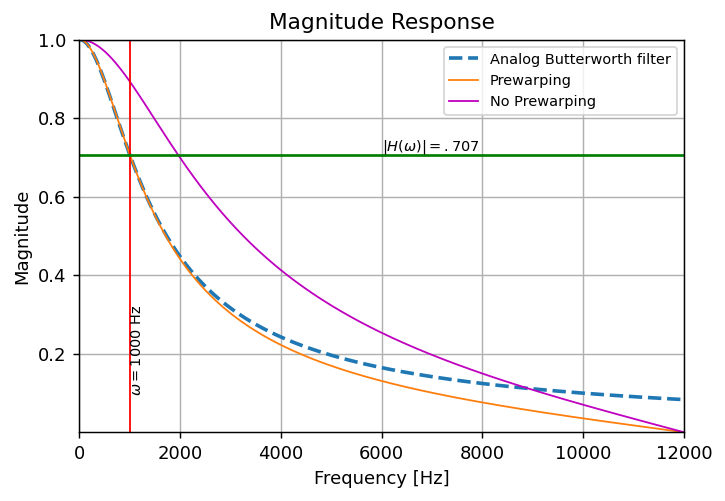

In [ ]:
fc=1000
fs=24000

#Analog Butterworth LPF
b = fc*array([1.])
a = array([1., fc]) 

w, h = freqs(b,a, worN=linspace(0, fs/2, 512))
plt.figure(dpi=130)
plt.plot(w, abs(h), linestyle='dashed',linewidth=2, label='Analog Butterworth filter')

#Low-pass IIR first-order Butterworth filter (Prewarping)
wa=tan((pi*fc)/fs)
b = wa/(wa+1)*array([1, 1])
a = array([1, (wa-1)/(wa+1)]) 

w, h = freqz(b,a, worN=1024)
plt.plot(w*fs/(2*pi), abs(h), linewidth=1,label='Prewarping')

#Low-pass IIR first-order Butterworth filter (No Prewarping)
wc= 2*pi*fc/fs
b = wc/(wc+1)*array([1, 1])
a = array([1, (wc-1)/(wc+1)]) 

w, h = freqz(b,a, worN=1024)
plt.plot(w*fs/(2*pi), abs(h), linewidth=1,color='m',label='No Prewarping')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude Response')
plt.xlim(0, fs/2)

plt.axvline(fc, color='red',linewidth=1) # cutoff frequency
plt.axhline(0.707, color='green') 

plt.text((fs/4), .707+0.01, r'$\left | H(\omega) \right |=.707$',fontsize=8)
plt.text(fc, 0.1, r'$\omega=%.0f$ Hz' %fc, rotation=90,fontsize=8)
plt.grid(True)
plt.legend(loc = 'best',fontsize=8)

plt.margins(0, 0)

plt.show()


## Warping effect

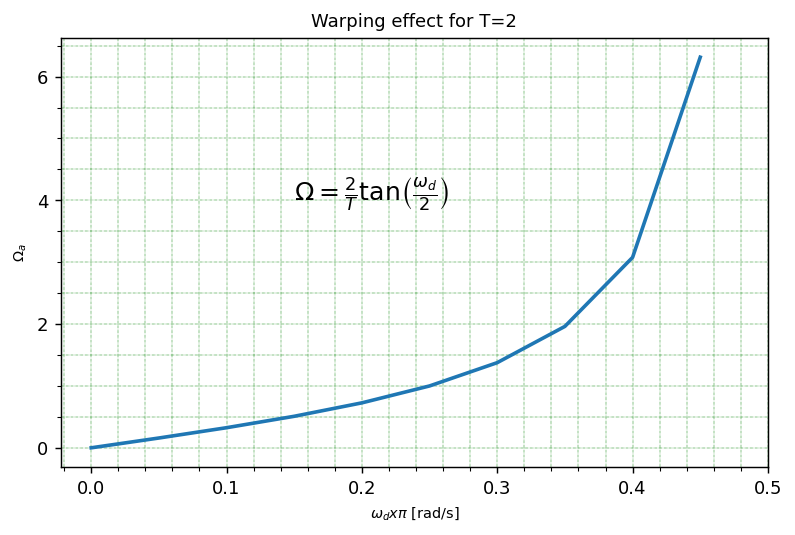

In [ ]:
fig, ax1=plt.subplots(1, 1,dpi=130,constrained_layout=True)

wa=tan(arange(0,pi/2,0.05*pi)) #T=2

ax1.plot(arange(0,1/2,0.05),wa, linewidth=2)
ax1.set_title('Warping effect for T=2', fontsize=10)
ax1.set_xlabel('$\omega_{d}x\pi$ [rad/s]',fontsize=8)
ax1.set_ylabel('$\Omega_{a}$',fontsize=8)

ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5])
ax1.set_yticks([0,2,4,6])

ax1.grid(color='g',which='both',axis='both', ls = '-.', lw = 0.25)
ax1.minorticks_on()
ax1.text(0.15, 4, r'$\Omega=\frac{2}{T}\tan\left ( \frac{\omega_{d}}{2} \right )$',fontsize=14)

plt.show()
